<a href="https://colab.research.google.com/github/Dicarvajalb/MetNumUN2021II/blob/main/LAB16/Group8AlgorithmicToolboxWeek6NumericalCalculusDerivativesIntegrals.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Part I. One-sided finite differences

Write a function, `deriv`, which computes a derivative of its argument at a given point, $x$, using a one-sided finite difference rule with a given step side $h$, with the approximation order of $O(h^2)$. 

In [ ]:
def deriv(f, x, h):
    """ Compute a derivative of `f` at point `x` with step size `h`.
    
    Compute the derivative using the one-sided rule of the approximation order of $O(h^2)$.
    
    Parameters
    ----------
    f : callable
        The function to differentiate
    x : float
        The point to compute the derivative at.
    h : float
        The step size for the finite different rule.
        
    Returns
    -------
    fder : derivative of f(x) at point x using the step size h.
    """
    # ... ENTER YOUR CODE HERE ...
    x1 = x + h
    dx = x1 - x
    df = f(x1) - f(x)

    return df / dx

#### Test I.1

Test your function on a simple test case: differentiate $f(x) = x^3$ at $x=0$. Comment on whether your results are consistent with the expected value of $f'(x) = 0$ and on an expected scaling with $h\to 0$.

 (10% of the total grade)

In [ ]:
x = 0
for h in [1e-2, 1e-3, 1e-4, 1e-5]:
    err = deriv(lambda x: x**3, x, h)
    print("%5f -- %7.4g" % (h, err))

0.010000 --  0.0001
0.001000 --   1e-06
0.000100 --   1e-08
0.000010 --   1e-10


 ... ENTER YOUR COMMENTS HERE ...
 
 As h (step size) decrease, the error term decreases as well

### Test I.2

Now use a slightly more complicated function, $f(x) = x^2 \log{x}$, evaluate the derivative at $x=1$ using your one-sided rule and a two-point one-sided rule. Roughly estimate the value of $h$ where the error stops decreasing, for these two schemes. 
(15% of the total grade)

In [ ]:
from math import log

def f(x):
    return x**2 * log(x)
    
def fder(x):
    return x * (2.*log(x) + 1)

In [ ]:
# ... ENTER YOUR CODE HERE ...
x = 0
for h in [1e-2, 1e-3, 1e-4, 1e-5]:
    err = deriv(f, x, h) - fder(x)
    print("%5f -- %7.4g" % (h, err))

0.010000 -- -0.04605
0.001000 -- -0.006908
0.000100 -- -0.000921
0.000010 -- -0.0001151


### Test I.3 

Now try differentiating $x^2 \log(x)$ at $x=0$. Use the three-point one-sided rule. Note that to evaluate the function at zero, you need to special-case this value. Check the scaling of the error with $h$, explain your results. 
(25% of the total grade)

In [ ]:
def f(x):
    if x == 0:
        # the limit of $x^2 log(x)$ at $x-> 0$ is zero, even though log(x) is undefined at x=0
        return 0.0
    else:
        return x**2 * log(x)
    
def fder(x):
    if x == 0:
        return 0.0
    else:
        return x*(2*log(x) + 1)

x = 0
for h in [1e-2, 1e-3, 1e-4, 1e-5]:
    err = deriv(f, x, h) - fder(x)
    print("%5f -- %7.4g" % (h, err))

0.010000 -- -0.04605
0.001000 -- -0.006908
0.000100 -- -0.000921
0.000010 -- -0.0001151


... ENTER YOUR EXPLANATION HERE ...

# Part II. Midpoint rule 

Write a function which computes a definite integral using the midpoint rule up to a given error, $\epsilon$. Estimate the error by comparing the estimates of the integral at $N$ and $2N$ elementary intervals. 

In [ ]:
def midpoint_rule(func, a, b, eps):
    """ Calculate the integral of f from a to b using the midpoint rule.
    
    Parameters
    ----------
    func : callable
        The function to integrate.
    a : float
        The lower limit of integration.
    b : float
        The upper limit of integration.
    eps : float
        The target accuracy of the estimate.
        
    Returns
    -------
    integral : float
        The estimate of $\int_a^b f(x) dx$.
    """
    # ... ENTER YOUR CODE HERE ...
    h = float(b-a)/eps
    result = 0
    for i in range(eps):
        result += func((a + h/2.0) + i*h)
    result *= h
    return result

### Test II.1

Test your midpoint rule on a simple integral, which you can calculate by paper and pencil.

Compare the rate of convergence to the expected $O(N^{-2})$ scaling by studying the number of intervals required for a given accuracy $\epsilon$.

Compare the numerical results to the value you calculated by hand. Does the deviation agree with your estimate of the numerical error?
(20% of the total grade)


In [ ]:
from math import exp

g = lambda y: exp(-y**2)
a = 0
b = 2

for i in range(1, 21):
    n = 2**i
    m = midpoint_rule(g, a, b, n)
    print ('%7d %.16f' % (n, m))

      2 0.8842000076332692
      4 0.8827889485397279
      8 0.8822686991994210
     16 0.8821288703366458
     32 0.8820933014203766
     64 0.8820843709743319
    128 0.8820821359746071
    256 0.8820815770754198
    512 0.8820814373412922
   1024 0.8820814024071774
   2048 0.8820813936736116
   4096 0.8820813914902204
   8192 0.8820813909443684
  16384 0.8820813908079066
  32768 0.8820813907737911
  65536 0.8820813907652575
 131072 0.8820813907631487
 262144 0.8820813907625702
 524288 0.8820813907624605
1048576 0.8820813907624268


### Test II.2

Now use your midpoint rule to compute the value of

$$
\int_0^1\! \frac{\sin{\sqrt{x}}}{x}\, dx
$$

up to a predefined accuracy of $\epsilon=10^{-4}$.

Note that the integral contains an integrable singularity at the lower limit. Do calculations two ways: first, do a straightforward computation; next, subtract the singularity. Compare the number of iterations required to achieve the accuracy of $\epsilon$.

(30% of the total grade)

In [ ]:
# ... ENTER YOUR CODE HERE ...

In [ ]:
a = 0.1; b = 0.2; expected = 0.3
computed = a + b
diff = abs(expected - computed)
tol = 1E-15
diff < tol

True

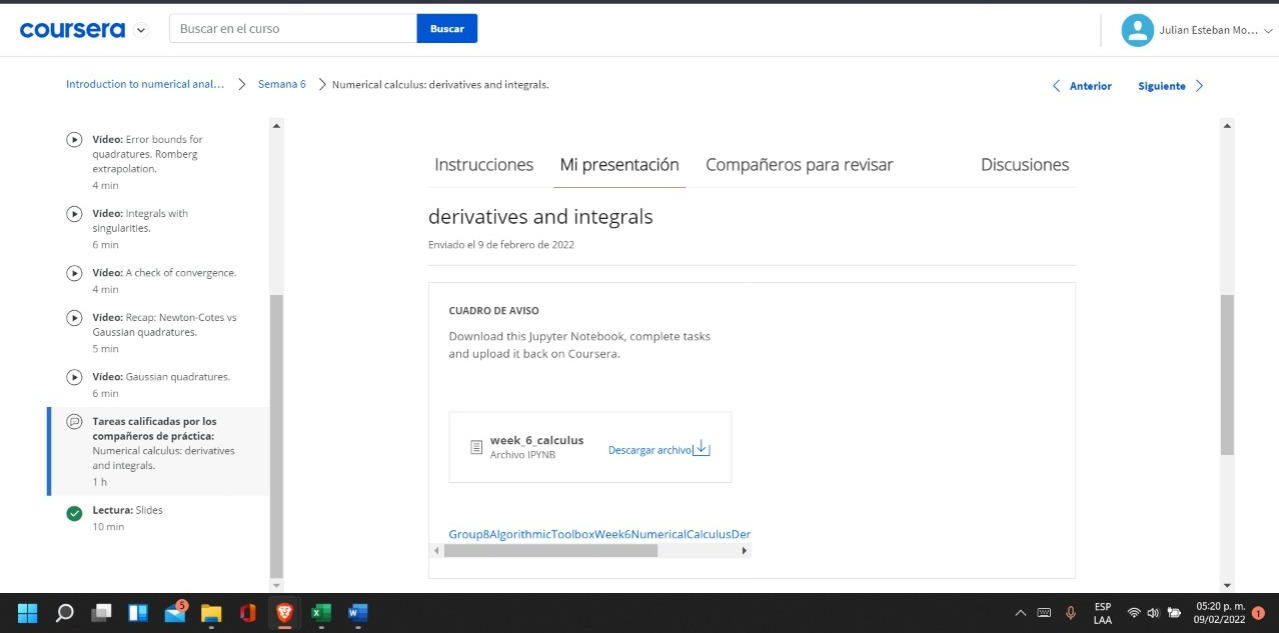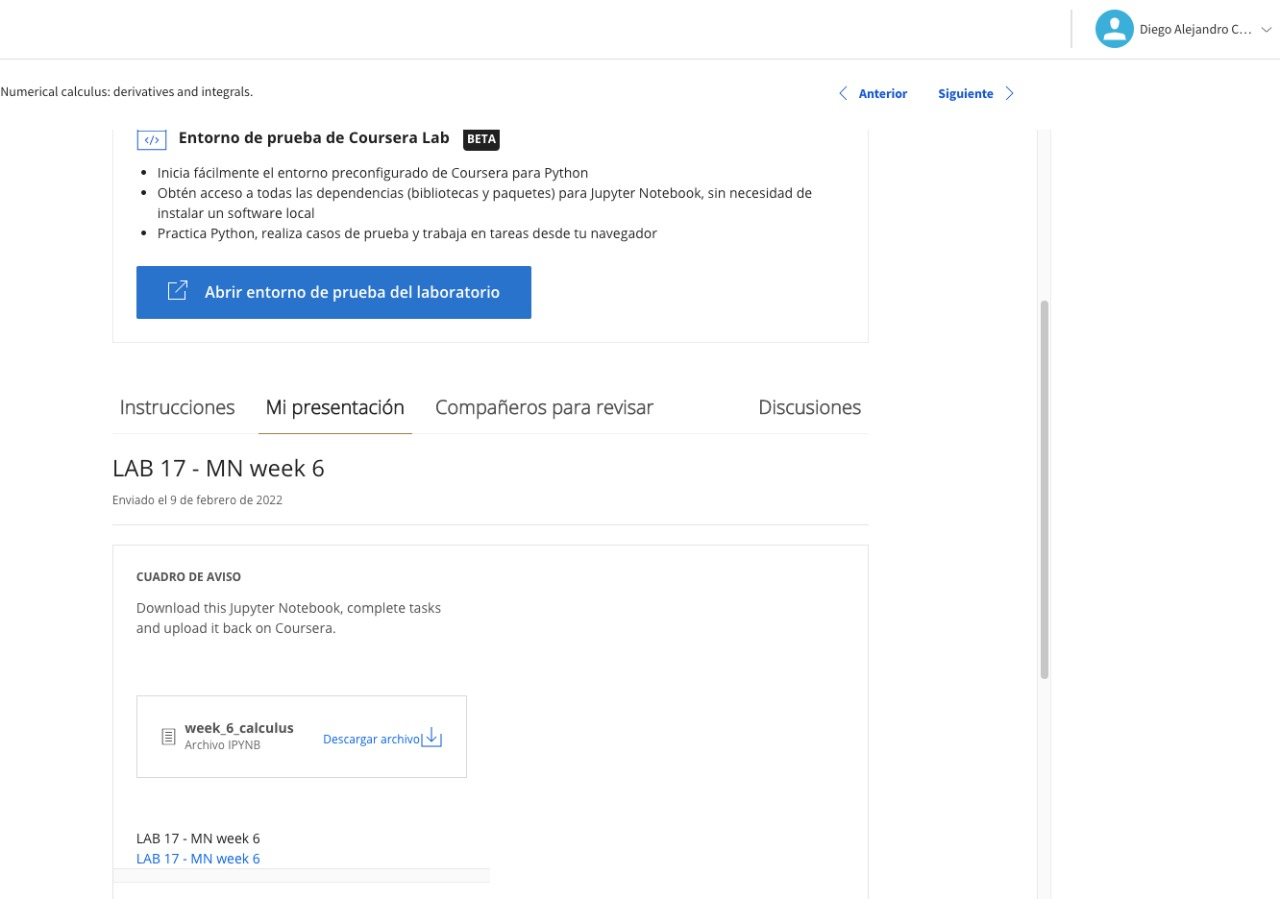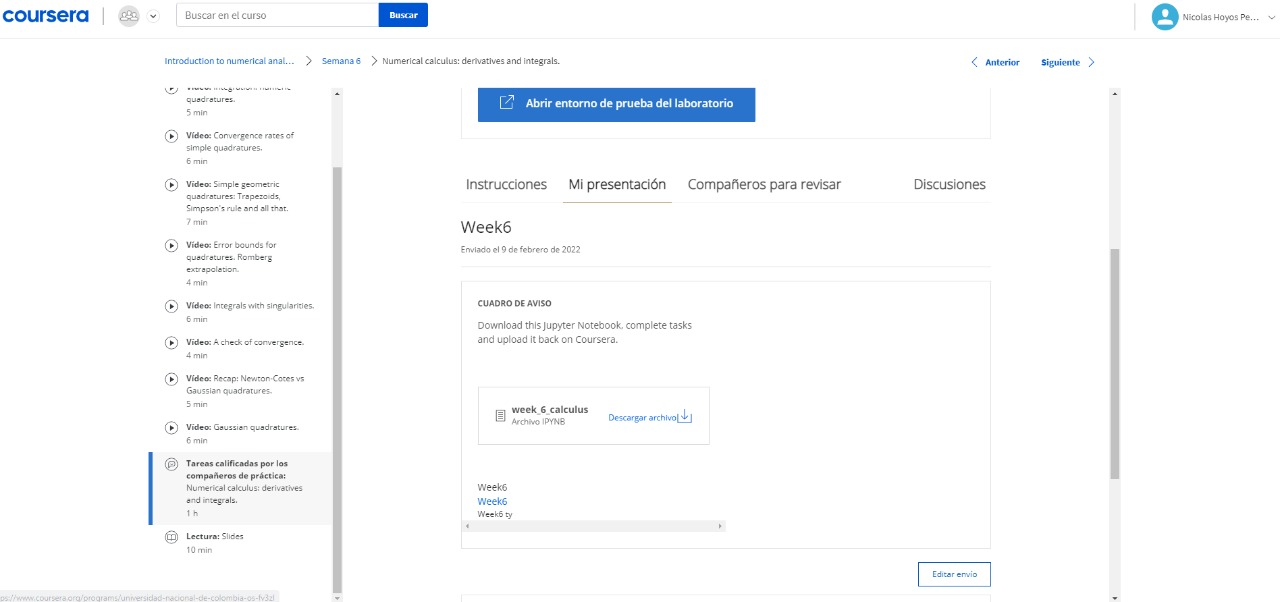